In [14]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import time
# For plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap


# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import  StandardScaler, MinMaxScaler, normalize
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Input
from keras.models import Model

In [4]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [6]:
def plot3clusters(X, title, vtitle):
  plt.figure()
  colors = ['navy', 'turquoise', 'darkorange']
  lw = 2

  for color, i, target_name in zip(colors, [0, 1, 2], target_names):
      plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,
                  label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title(title)  
  plt.xlabel(vtitle + "1")
  plt.ylabel(vtitle + "2")
  plt.show()

In [8]:
from sklearn.decomposition import PCA

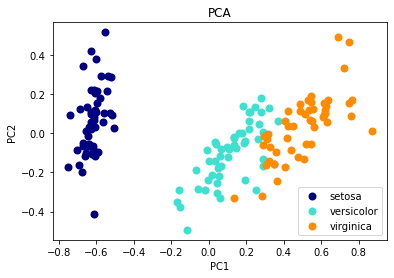

In [10]:

pca =PCA()
pca_transformed = pca.fit_transform(X_scaled)
plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  

In [17]:
input_dim = X_scaled.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

history = autoencoder.fit(X_scaled, X_scaled,
                epochs=200,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


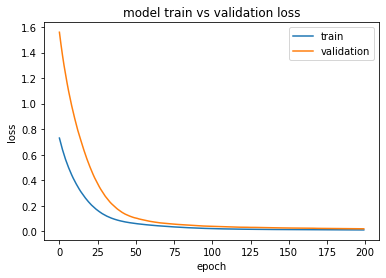

In [18]:
#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [19]:
# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)



In [25]:
len(encoded_data[0])

2

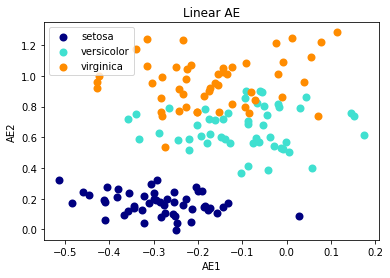

In [23]:
plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')  

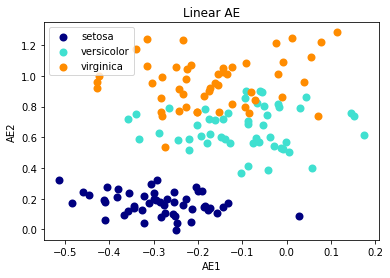

In [26]:
plot3clusters(encoded_data[:,], 'Linear AE', 'AE')  

### Second AE
-Lets create a second AE, this time we’ll replace both linear activation functions with a sigmoid. This network structure can be thought of PCA with non-linear transformation and similarly to the one above it converges to a local minimum and we can plot the resulting dense-vectors.

In [27]:
input_dim2 = X_scaled.shape[1]
encoding_dim2 = 2  
input_img2 = Input(shape=(input_dim2,))
encoded2 = Dense(encoding_dim2, activation='sigmoid')(input_img2)
decoded2 = Dense(input_dim2, activation='sigmoid')(encoded2)
autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='adam', loss='mse')
print(autoencoder2.summary())

history2 = autoencoder2.fit(X_scaled, X_scaled,
                epochs=2000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)



Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


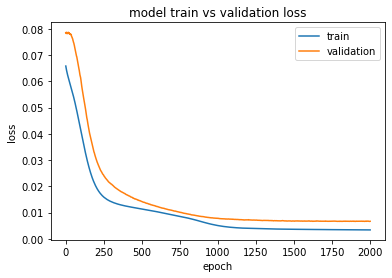

In [28]:

#plot our loss 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

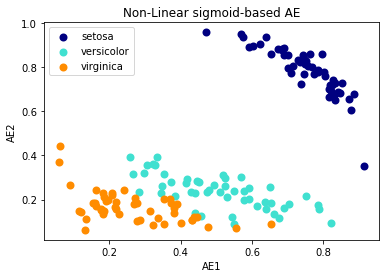

In [29]:
# use our encoded layer to encode the training input
encoder2 = Model(input_img2, encoded2)
encoded_input2 = Input(shape=(encoding_dim2,))
decoder_layer2 = autoencoder2.layers[-1]
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))
encoded_data2 = encoder2.predict(X_scaled)

plot3clusters(encoded_data2[:,:2], 'Non-Linear sigmoid-based AE', 'AE')  

## LAST AE
- Our last AE uses relu activation with an L1 regularizer. It is another way of saying that we want to approximate PCA by using a non-linear AE with constrained representations [2]. Similarly to the Previous networks it converges to a local minimum and both dense-vectors show three clusters contained in two blobs.

In [31]:
from tensorflow.keras import regularizers

In [34]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim3 = X_scaled.shape[1]
encoding_dim3 = 2  
input_img3 = Input(shape=(input_dim3,))
encoded3 = Dense(encoding_dim3, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img3)
decoded3 = Dense(input_dim3, activation='sigmoid')(encoded3)
autoencoder3 = Model(input_img3, decoded3)
autoencoder3.compile(optimizer='adam', loss='mse')
print(autoencoder3.summary())

history3 = autoencoder3.fit(X_scaled, X_scaled,
                epochs=400,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)


Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


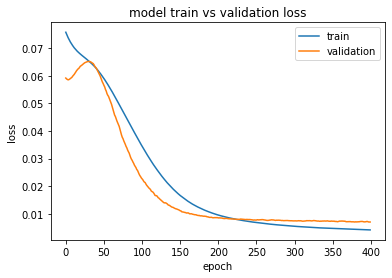

In [35]:
#plot our loss 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


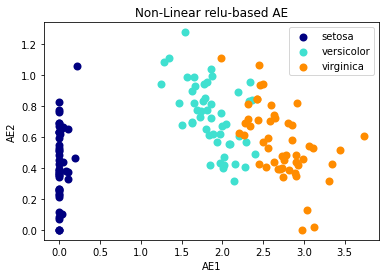

In [37]:
#use our encoded layer to encode the training input
encoder3 = Model(input_img3, encoded3)
encoded_input3 = Input(shape=(encoding_dim3,))
decoder_layer3 = autoencoder3.layers[-1]
decoder3 = Model(encoded_input3, decoder_layer3(encoded_input3))
encoded_data3 = encoder3.predict(X_scaled)

plot3clusters(encoded_data3[:,:2], 'Non-Linear relu-based AE', 'AE')  

- After training all 3 autoencoders and pushing our training data through the hidden layer, we compare the first 2 PCs and the AE’s dense features. We can clearly see that the figures in these vectors are not the same, across all models. This is very clear from plotting each two vectors and looking at the resulting clusters. Next we would like to compare how a simple KMEANS with 2 and 3 clusters classifies the data.

In [38]:
print('PCA\n',pca_transformed[:,0:2][0:10])
print()
print('Linear AE\n',encoded_data[0:10])
print()
print('Nonlinear AE with sigmoid\n',encoded_data2[0:10])
print()
print('Nonlinear AE with relu\n',encoded_data3[0:10])

PCA
 [[-0.63070293  0.10757791]
 [-0.62290494 -0.10425983]
 [-0.6695204  -0.05141706]
 [-0.65415276 -0.10288487]
 [-0.64878806  0.13348758]
 [-0.53527278  0.28961572]
 [-0.65653779  0.01072449]
 [-0.6257805   0.05713354]
 [-0.6756435  -0.20070328]
 [-0.64564462 -0.06720801]]

Linear AE
 [[-0.28568324  0.17594971]
 [-0.14296862  0.14376481]
 [-0.25614345  0.09759723]
 [-0.2529426   0.08731175]
 [-0.3452791   0.15485375]
 [-0.4043245   0.2759206 ]
 [-0.36790726  0.09642889]
 [-0.2764655   0.16168855]
 [-0.21645665  0.04686248]
 [-0.17766467  0.12892938]]

Nonlinear AE with sigmoid
 [[0.7457362  0.83556116]
 [0.8311026  0.67407763]
 [0.8281863  0.7407547 ]
 [0.84201074 0.68674326]
 [0.74192077 0.85441947]
 [0.60345197 0.89363396]
 [0.8027419  0.77818793]
 [0.76778585 0.8014783 ]
 [0.87774086 0.6058219 ]
 [0.82413685 0.718058  ]]

Nonlinear AE with relu
 [[0.         0.36688608]
 [0.01538049 0.6539334 ]
 [0.         0.595738  ]
 [0.         0.69278216]
 [0.         0.34399825]
 [0.        

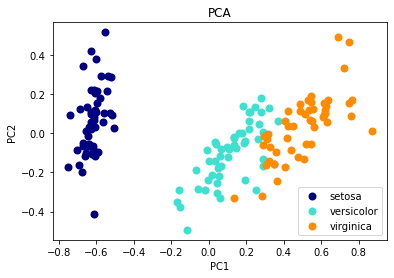

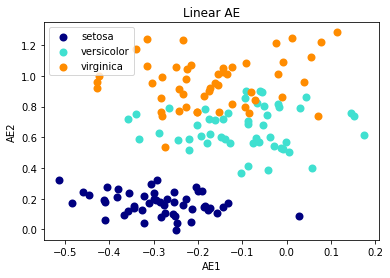

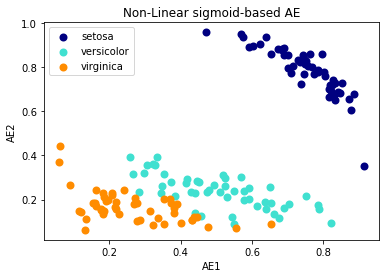

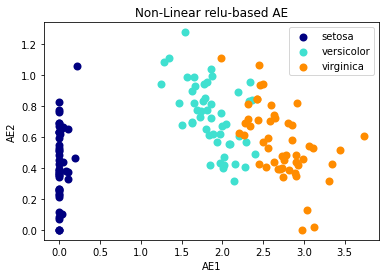

In [39]:
plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  
plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')  
plot3clusters(encoded_data2[:,:2], 'Non-Linear sigmoid-based AE', 'AE')  
plot3clusters(encoded_data3[:,:2], 'Non-Linear relu-based AE', 'AE')  

- We would like to know if each result, clustered with KMEANS (k=2 & 3), can label the data similarly across all models, even if the dense range is very different. The following is a printed classification vector and metrics for the samples in the training set. The printed output and metrics show, that using different dense representation that were created by different algorithms, two identical or three very similar clusters can be found. We can see that the metric scores are mostly identical when clustering the two blobs and the metric figures are very close when clustering for the three known flower classes. Please note that minor differences can happen due to the random nature of neural networks.

In [42]:
from sklearn.cluster import KMeans
labels_true = y 
titles = ['PCA', 'Linear AE', 'Sigmoid AE', 'Relu AE']
for n_clusters_ in [2,3]:
  estimators = [('PCA'    , KMeans(n_clusters=n_clusters_), pca_transformed),
                ('AE linear' , KMeans(n_clusters=n_clusters_), encoded_data),
                ('AE sigmoid' , KMeans(n_clusters=n_clusters_), encoded_data2),
                ('AE relu', KMeans(n_clusters=n_clusters_), encoded_data3)]

  print(type(y))
  print('Number of clusters: %d' % n_clusters_)
  for name, est, data in estimators:
      X = data
      est.fit(X)
      labels = est.labels_
      print(name,':')
      print(labels[:]) 
      print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
      print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
      print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
      print("Adjusted Rand Index: %0.3f"
            % metrics.adjusted_rand_score(labels_true, labels))
      print("Adjusted Mutual Information: %0.3f"
            % metrics.adjusted_mutual_info_score(labels_true, labels))
      print("Silhouette Coefficient: %0.3f"
            % metrics.silhouette_score(X, labels))
      print()
  print()
  print('----------------------------------------------------------------------------------')
  print()

<class 'numpy.ndarray'>
Number of clusters: 2
PCA :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Homogeneity: 0.579
Completeness: 1.000
V-measure: 0.734
Adjusted Rand Index: 0.568
Adjusted Mutual Information: 0.732
Silhouette Coefficient: 0.630

AE linear :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Homogeneity: 0.510
Completeness: 0.858
V-measure: 0.640
Adjusted Rand Index: 0.531
Adjusted Mutual Information: 0.637
Silhouette Coefficient: 0.601

AE sigmoid :
[0 0 0 0 0 0 

- You’ll see that there are quite some metrics to consider:

- The homogeneity score tells you to what extent all of the clusters contain only data points which are members of a single class.
- The completeness score measures the extent to which all of the data points that are members of a given class are also elements of the same cluster.
- The V-measure score is the harmonic mean between homogeneity and completeness.
- The adjusted Rand score measures the similarity between two clusterings and considers all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The Adjusted Mutual Info (AMI) score is used to compare clusters. It measures the similarity between the data points that are in the clusterings, accounting for chance groupings and takes a maximum value of 1 when clusterings are equivalent.
- The silhouette score measures how similar an object is to its own cluster compared to other clusters. The silhouette scores range from -1 to 1, where a higher value indicates that the object is better matched to its own cluster and worse matched to neighboring clusters. If many points have a high value, the clustering configuration is good.

- if the value for the silhouette score is close to 0, which indicates that the sample is on or very close to the decision boundary between two neighboring clusters. This could indicate that the samples could have been assigned to the wrong cluster. Also, the ARI measure seems to indicate that not all data points in a given cluster are similar and the completeness score tells you that there are definitely data points that weren’t put in the right cluster.